# Alpaca Identification
![](https://wallpaperaccess.com/full/2889559.jpg)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Importing all the required libraries and Dataset
5. EfficientNet Model Deployment
6. Evaluate the model
7. Make Predictions
8. Conclusion

**************************

### Abstract
This project is all about image classification by using the
deep neural network (DNN) or also known as Deep Learning
by using framework TensorFlow. Python is used as a
programming language because it comes together with
TensorFlow framework. The input data mainly focuses in
flowers category which there are five (5) types of flowers that
have been used in this paper. Deep neural network (DNN) has
been choosing as the best option for the training process
because it produced a high percentage of accuracy. Results are
discussed in terms of the accuracy of the image classification
in percentage. Here we are going to use Alpaca Images for creating the classification model which will identify the images of Alpaca from the user input.

### Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : https://www.kaggle.com/sid4sal/alpaca-dataset-small.

### Goal
The goal of this project is to make a identification cum classification model using deep neural networks, which will identify the images of Alpaca from the user given input.
******************************************

### **Import Libraries and Dataset**

In [1]:
import tensorflow as tf
import numpy as np
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import time
import glob
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import cv2
import shutil

### **Create Dataframe from Images**

In [2]:
base_path = '../input/alpaca-dataset-small/dataset'
classes = os.listdir(base_path)
filepaths = []
labels = []
for c in classes:
    flist = os.listdir(base_path + '/' + c)
    for f in flist:
        fpath = os.path.join(base_path, c, f)
        filepaths.append(fpath)
        labels.append(c)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  327    labels:  327


In [3]:
Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries,Lseries], axis=1)
df=pd.DataFrame(np.array(df).reshape(327,2), columns = ['file_paths', 'labels'])
print(df['labels'].value_counts())

not alpaca    185
alpaca        142
Name: labels, dtype: int64


### Observation

The dataset is a little unbalanced, but not enough to where it makes sense to remove or augment images. 

### **Visualize Images**

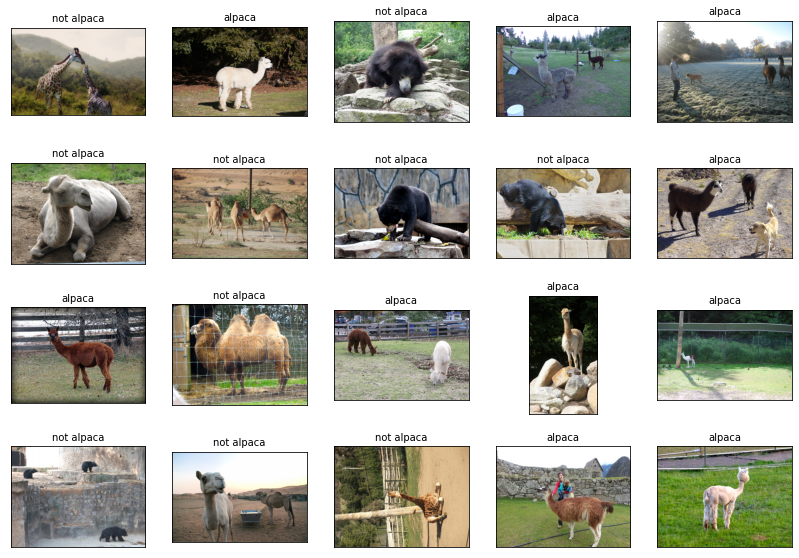

In [4]:
plt.figure(figsize=(14,10))
for i in range(20):
    random = np.random.randint(1,len(df))
    plt.subplot(4,5,i+1)
    img = df.loc[random,"file_paths"]
    plt.imshow(plt.imread(img))
    plt.title(df.loc[random, "labels"], size = 10, color = "black") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

### Observation

Looks like we can perform zooming and  height and width shearing with ImageDataGenerator.
************

### **Split Datatframe into Train, Validation, and Test**

In [5]:
train_df, test_df = train_test_split(df, train_size=0.96, random_state=1)
train_df, valid_df = train_test_split(train_df, train_size=0.96, random_state=1)
print(train_df.labels.value_counts())
print(valid_df.labels.value_counts())
print(test_df.labels.value_counts())

not alpaca    170
alpaca        130
Name: labels, dtype: int64
not alpaca    8
alpaca        5
Name: labels, dtype: int64
alpaca        7
not alpaca    7
Name: labels, dtype: int64


### **ImageDataGenerator**

In [6]:
target_size=(300,300)
batch_size=32

In [7]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)
train_gen = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='binary')
valid_gen = test_datagen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='binary')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='binary')

Found 300 validated image filenames belonging to 2 classes.
Found 13 validated image filenames belonging to 2 classes.
Found 14 validated image filenames belonging to 2 classes.


*************************************
## Deploying the Model using Neural Network
A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.

A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data. CNN have their “neurons” arranged more like those of the frontal lobe, the area responsible for processing visual stimuli in humans and other animals.

**EfficientNet** is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient. Unlike conventional practice that arbitrary scales these factors, the EfficientNet scaling method uniformly scales network width, depth, and resolution with a set of fixed scaling coefficients. For example, if we want to use  times more computational resources, then we can simply increase the network depth by , width by , and image size by , where  are constant coefficients determined by a small grid search on the original small model. EfficientNet uses a compound coefficient  to uniformly scales network width, depth, and resolution in a principled way.

The compound scaling method is justified by the intuition that if the input image is bigger, then the network needs more layers to increase the receptive field and more channels to capture more fine-grained patterns on the bigger image.

The base EfficientNet-B0 network is based on the inverted bottleneck residual blocks of MobileNetV2, in addition to squeeze-and-excitation blocks.

let's deploy the model!

### Model used here : `EfficientNet B3 Architecture`

In [8]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False, input_shape=(300,300,3))
model = tf.keras.Sequential([
    base_model, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

43941888/43941136 [==============================] - 1s 0us/step


In [9]:
lr=0.001
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

### **Callbacks**

In [10]:
patience = 2
stop_patience = 5
factor = 0.5

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("classify_model.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

### **Training the model** and ReduceLROnPlateau on the model

In [11]:
epochs = 30
history = model.fit(train_gen, validation_data=valid_gen, epochs=epochs, callbacks=callbacks, verbose=1)

Epoch 1/30
10/10 [==============================] - 33s 2s/step - loss: 0.5686 - accuracy: 0.7164 - val_loss: 0.5482 - val_accuracy: 0.7692
Epoch 2/30
10/10 [==============================] - 12s 1s/step - loss: 0.1770 - accuracy: 0.9470 - val_loss: 0.8787 - val_accuracy: 0.8462
Epoch 3/30
10/10 [==============================] - 12s 1s/step - loss: 0.1393 - accuracy: 0.9441 - val_loss: 1.5127 - val_accuracy: 0.7692

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/30
10/10 [==============================] - 12s 1s/step - loss: 0.0521 - accuracy: 0.9850 - val_loss: 1.2868 - val_accuracy: 0.8462
Epoch 5/30
10/10 [==============================] - 12s 1s/step - loss: 0.0280 - accuracy: 0.9953 - val_loss: 1.3481 - val_accuracy: 0.8462

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/30
10/10 [==============================] - 12s 1s/step - loss: 0.0352 - accuracy: 0.9908 - val_loss: 0.5759 - val_accuracy: 0.846

### Checking the Accuracy and Loss of the Model

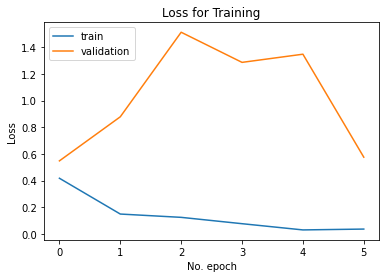

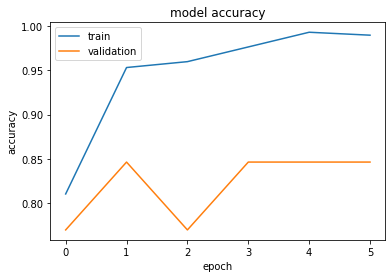

In [12]:
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### **Predictions on Test Set**

In [13]:
best_model = model
best_model.load_weights('./classify_model.h5')
best_model.evaluate(test_gen)

1/1 [==============================] - 1s 590ms/step - loss: 0.2839 - accuracy: 0.9286


[0.2839098572731018, 0.9285714030265808]

***************************************
## Conclusion
* Images classification is one of the hot topics in today's world.
* Usage of Concolution Neural Network in this type of classification works makes the developer easier to develope models using the architectures.
* For this project we have used the ***EfficientNet B3 Architecture*** to develop the model.
* ***EfficientNet B3 Architecture*** is having the accuracy of 0.93, with macro average of 0.94 and weighted average of 0.92.
* Hence, from my side, this is the best model to be deployed using this dataset, to identify the Alpaca images by the user given input.
*****************************************
### Thank You!